# **Projekt**
Celem projektu jest przygotowanie analizy która określa czy dany pasażer przezył podróż na Titanicu czy też nie. Do naszej dyspozycji otrzymujemy dwa pliki train.csv oraz test.csv. Dla pliku test nie otrzymaliśmy kolumny z danymi czy pasażer przeżył. Należy to określić na podstawie danych zawartych w train.csv, w którym otrzymaliśmy dane pasażerów (wiek, liczę członków rodziny na pokładzie statku, płeć, klase, cel podróży itp). Wybrałem ten projekt z samouczkiem iż jest to nowa dziedzina nauki jaką poznaję.

> Importowanie odpowiednich blibliotech by móc przeprowadzić naukę oraz wygenerować odpowiednie wykresy.

In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


> W pierwszej fazie projektu chciałbym zastanowić sie nad dostępnymi parametremi. Przedstawienie ich za pomocą wykresów ułatwia szybszą oraz wzrokową analize dużej ilości danych. Lecz w pierwszej kolejności sprawdzę ile jest braków w tabeli by wiedzieć czy dane wykresy są wiarygodne.

In [25]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
#Sprawdzenie ilości braków informacji w pliku train
train_data.isnull().sum() 
#train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
#Sprawdzenie ilości braków informacji w pliku test
test_data.isnull().sum() 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Wnioski na temat pustych komórek tabeli :
Główne braki dla dwóch typów danych występują w kolumnach Age oraz Cabin. Dla pliku test braków jest znacznie mniej. 86 brakujących informacji o wieku pasażerów nieznacznie wpłynie na wynik. W pierwszym etapię przedstawie wykresy przeżywalności oraz gęstości osób bez podejmowania żadnych działań odnośnie brakujących danych tak by w późniejszym czasie móc porównać je po ich uzupełnieniu.

Text(0, 0.5, 'Wskaźnik przeżycia')

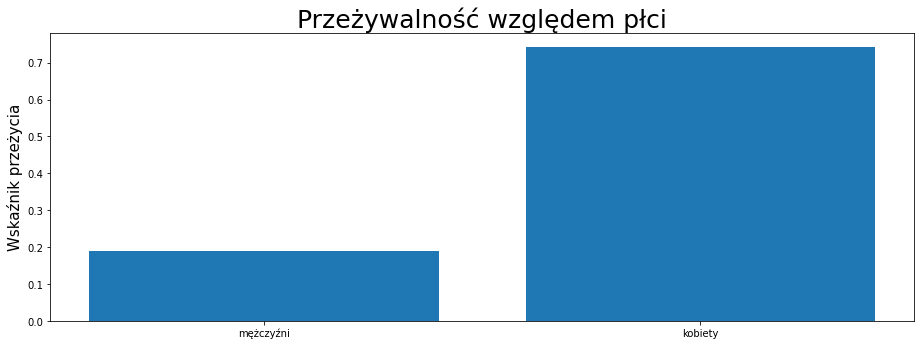

In [29]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
rate_sex = [rate_men,rate_women]
labels = ['mężczyźni','kobiety']
fig = plt.figure()
ax = fig.add_axes([2,1,2,1])
ax.bar(labels, rate_sex)
ax.set_title('Przeżywalność względem płci',size = 25)
ax.set_ylabel('Wskaźnik przeżycia',size = 15)

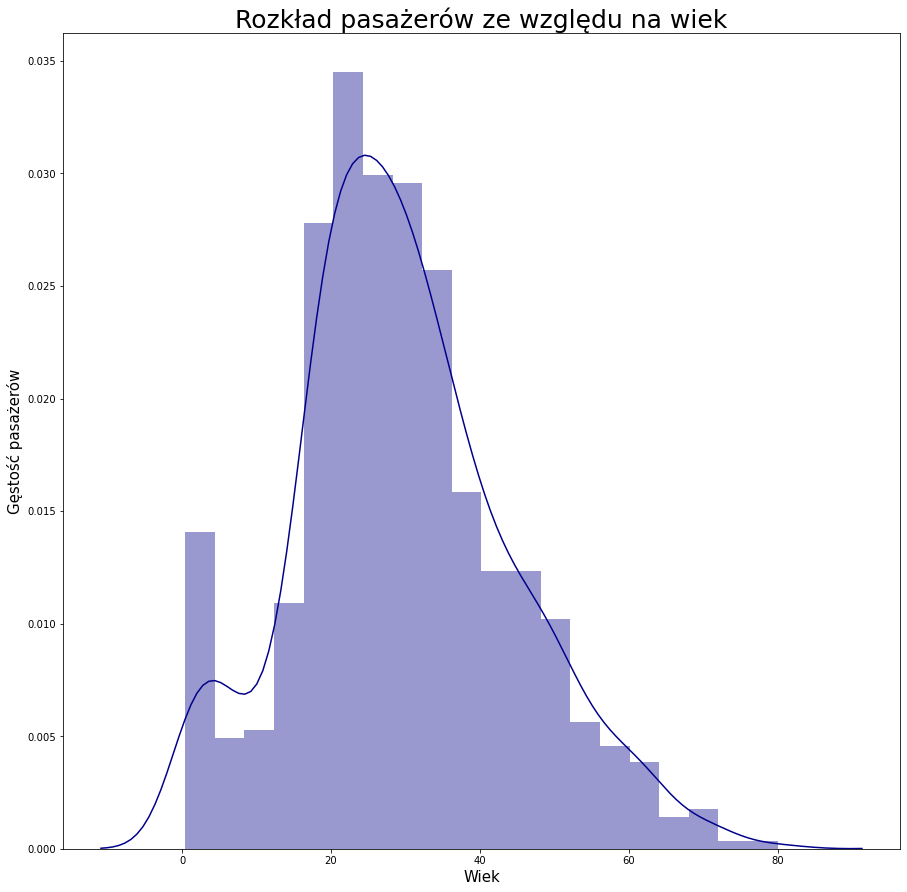

In [30]:
train=pd.read_csv("../input/titanic/train.csv")
plt.figure(figsize=(15,15))
fig = sns.distplot(train['Age'], color="darkblue")
fig.set_xlabel("Wiek",size=15)
fig.set_ylabel("Gęstość pasażerów",size=15)
plt.title('Rozkład pasażerów ze względu na wiek',size = 25)
plt.show()

In [31]:
print("Średni wiek:",train['Age'].mean())

Średni wiek: 29.69911764705882


> Powyżej przedstawione zostały wykresy dla danych z brakami wieku. Następnie poniżej wypełniam brakujące miejsca medianą wieku. 

In [32]:
train_data.Age = train_data.Age.fillna(train_data.Age.median())
test_data.Age = test_data.Age.fillna(test_data.Age.median())
train_data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

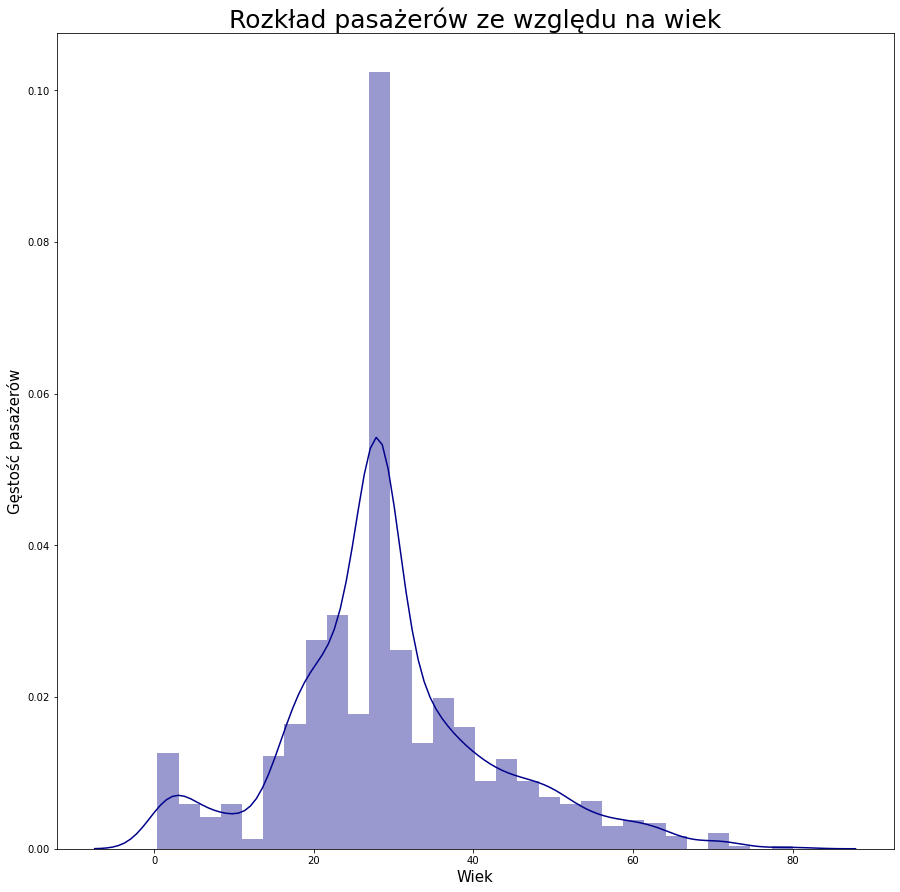

In [36]:
plt.figure(figsize=(15,15))
fig = sns.distplot(train_data['Age'], color="darkblue")
fig.set_xlabel("Wiek",size=15)
fig.set_ylabel("Gęstość pasażerów",size=15)
plt.title('Rozkład pasażerów ze względu na wiek',size = 25)
plt.show()

In [34]:
print("Średni wiek:",train_data['Age'].mean())

Średni wiek: 29.36158249158249


> Jak widzimy zagęszczenie w wieku 29 lat znacznie zwiększyło się natomiast grupa ludzi o wieku w okolicach 0-1 lat zmniejszyła sie. Również warto zaznaczyć iż ogólna zmiana śedniego wieku nie wyniosła zbyt wiele. Tak duże zagęszczenie ludzi w tym wieku może spowodować zaburzenie współczynnika przeżycia w niżej zadeklarowanych przedziałach.

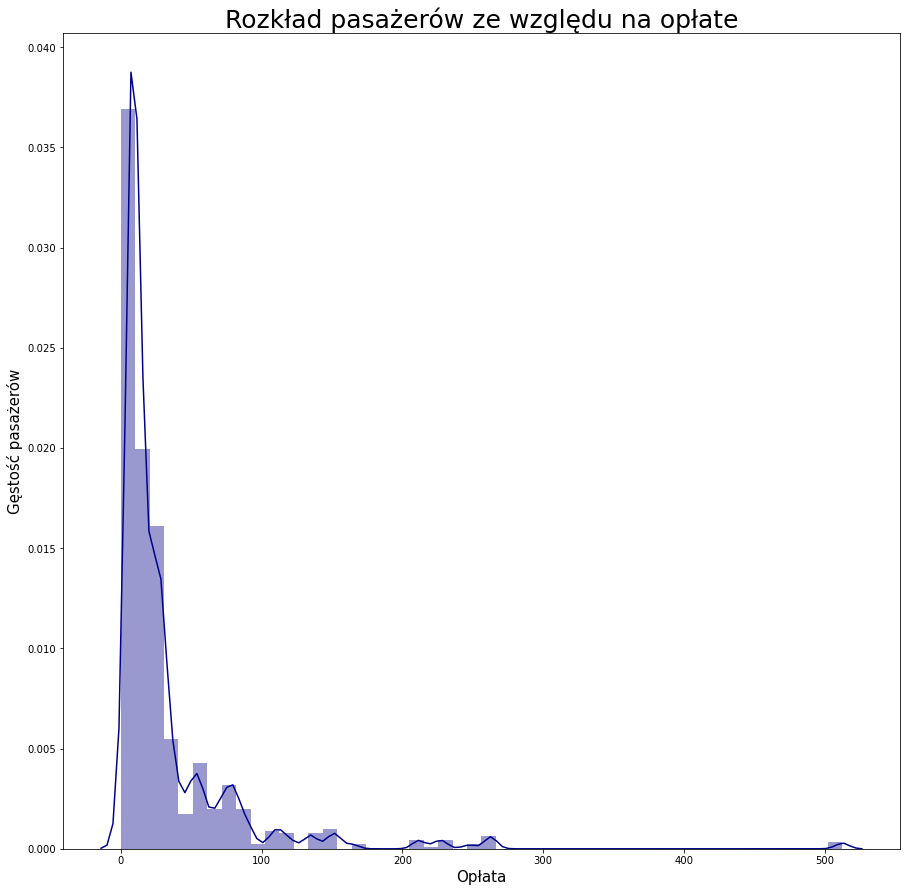

In [39]:
train=pd.read_csv("../input/titanic/train.csv")
plt.figure(figsize=(15,15))
fig = sns.distplot(train['Fare'], color="darkblue")
fig.set_xlabel("Opłata",size=15)
fig.set_ylabel("Gęstość pasażerów",size=15)
plt.title('Rozkład pasażerów ze względu na opłate',size = 25)
plt.show()

In [40]:
print('Avgerage. Fare : ',train['Fare'].mean())

Avgerage. Fare :  32.2042079685746


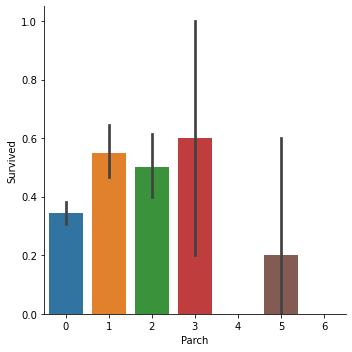

In [41]:
sns.catplot(x='Parch',y='Survived',data=train_data,kind='bar')

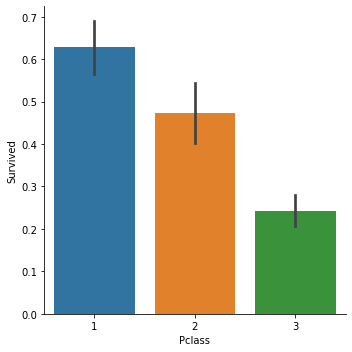

In [42]:
sns.catplot(x='Pclass',y='Survived',data=train_data,kind='bar')

In [43]:
print('Średnia klasa : ',train['Pclass'].mean())

Średnia klasa :  2.308641975308642


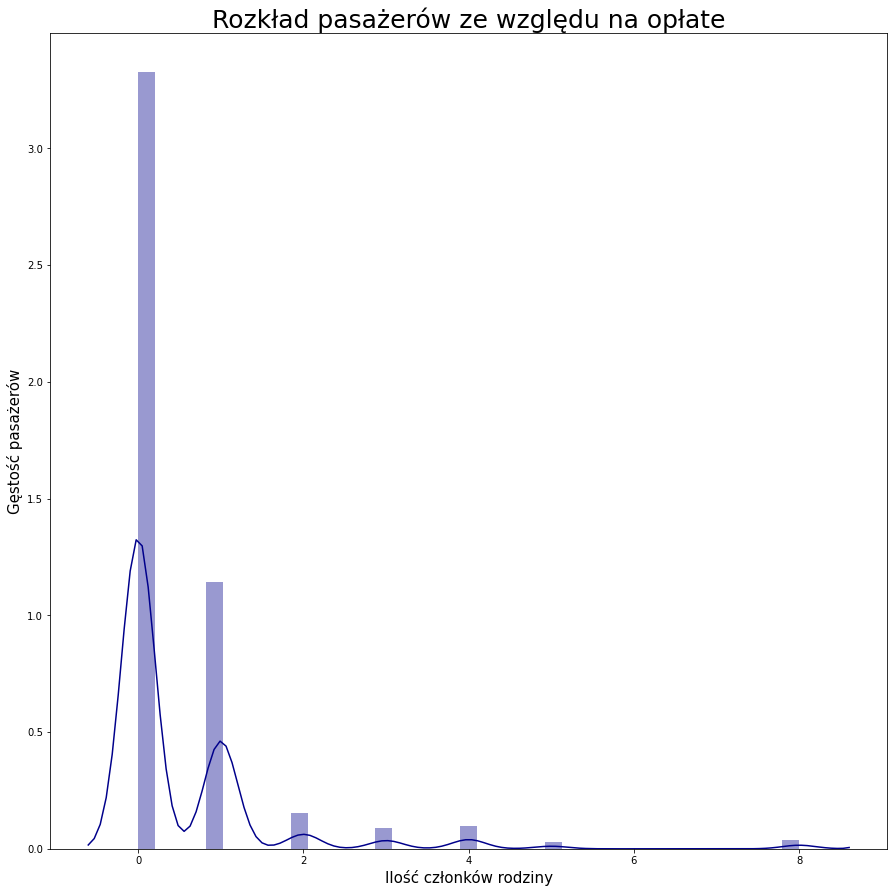

In [44]:
train=pd.read_csv("../input/titanic/train.csv")
plt.figure(figsize=(15,15))
fig = sns.distplot(train['SibSp'], color="darkblue")
fig.set_xlabel("Ilość członków rodziny",size=15)
fig.set_ylabel("Gęstość pasażerów",size=15)
plt.title('Rozkład pasażerów ze względu na opłate',size = 25)
plt.show()

# Wnioski na temat powyższych wykresów
Do stworzenia powyższego kodu użyłem informacji zawartych w plikach train.csv oraz różnych technik tworzena wykresów. Największą grupą ludzi, którzy przeżyli byli:
* 25-35 latkowie,
* pasażerowie, którzy podróżowali w 1 klasie
* nie mieli zbyt wielu znajomych rodziny na pokładzie,
* mieli kilku członków rodziny
* kobietami

Dla powyższych wniosków stworzyłem dodatkowe drzewa decyzyjne w metodzie losowego lasu. Wycofałem się z pomysłu na wypełnianie medianą braków gdyż przypuszczam, że współczynnik przeżycia w grupach zostanie zaburzony i wyniki ulegną pogorszeniu.

In [45]:
#Podział ludzi na grupy wiekowe by polepszyć najlepsze dopasowanie miedzy grupami z pliku train i test
train['Age_analiza'] = pd.cut(train['Age'], 5, labels=["1","2","3","4","5"])
train.head()
#train[['Age_analiza', 'Survived']].groupby(['Age_analiza']).mean().sort_values(by='Age_analiza', ascending=True) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_analiza
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


In [46]:
#Podział ludzi na grupy ze wzgldu na ilość członków rodziny by polepszyć najlepsze dopasowanie miedzy grupami z pliku train i test
train['SibSp_analiza'] = pd.cut(train['SibSp'], 3, labels=["1","2","3"])
train.head()
#train[['SibSp_analiza', 'Survived']].groupby(['SibSp_analiza']).mean().sort_values(by='SibSp_analiza', ascending=True) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_analiza,SibSp_analiza
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,1


In [47]:
#Podział ludzi na grupy ze wzgldu na ilość członków rodziny by polepszyć najlepsze dopasowanie miedzy grupami z pliku train i test
train['Parch_analiza'] = pd.cut(train['Parch'], 2 , labels=["1","2"])
train.head()
#train[['Parch_analiza', 'Survived']].groupby(['Parch_analiza']).mean().sort_values(by='Parch_analiza', ascending=True) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_analiza,SibSp_analiza,Parch_analiza
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,1,1


In [48]:
#Podział ludzi na grupy ze wzgldu na ilość członków rodziny by polepszyć najlepsze dopasowanie miedzy grupami z pliku train i test
train['Fare_analiza'] = pd.cut(train['Fare'],7 , labels=["1","2","3","4","5","6","7"] )
train.head()
#train[['Fare_analiza', 'Survived']].groupby(['Fare_analiza']).mean().sort_values(by='Fare_analiza', ascending=True) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_analiza,SibSp_analiza,Parch_analiza,Fare_analiza
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,1,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,1,1,1


**Do potrzeb analizy danych przedziałow zastosowałem nadanie im wartości liczbowych, tak by można było je porównać między plikami.To samo działanie przeprowadzam dla pliku test.csv. Ma to na celu umożliwinie porównania nowo powstałych kolumn**


In [49]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
#Podział ludzi na grupy wiekowe by polepszyć najlepsze dopasowanie miedzy grupami z pliku train i test
test['Age_analiza'] = pd.cut(test['Age'], 5, labels=["1","2","3","4","5"])
test.head()
#train[['Age_analiza', 'Survived']].groupby(['Age_analiza']).mean().sort_values(by='Age_analiza', ascending=True) 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_analiza
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,4
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,5
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [50]:
#Podział ludzi na grupy ze wzgldu na ilość członków rodziny by polepszyć najlepsze dopasowanie miedzy grupami z pliku train i test
test['SibSp_analiza'] = pd.cut(test['SibSp'], 3, labels=["1","2","3"])
test.head()
#train[['SibSp_analiza', 'Survived']].groupby(['SibSp_analiza']).mean().sort_values(by='SibSp_analiza', ascending=True) 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_analiza,SibSp_analiza
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,3,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,4,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,5,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,1


In [51]:
#Podział ludzi na grupy ze wzgldu na ilość członków rodziny by polepszyć najlepsze dopasowanie miedzy grupami z pliku train i test
test['Parch_analiza'] = pd.cut(test['Parch'], 2 , labels=["1","2"])
test.head()
#train[['Parch_analiza', 'Survived']].groupby(['Parch_analiza']).mean().sort_values(by='Parch_analiza', ascending=True) 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_analiza,SibSp_analiza,Parch_analiza
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,3,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,4,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,5,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,1,1


In [52]:
#Podział ludzi na grupy ze wzgldu na ilość członków rodziny by polepszyć najlepsze dopasowanie miedzy grupami z pliku train i test
test['Fare_analiza'] = pd.cut(test['Fare'],7 , labels=["1","2","3","4","5","6","7"] )
test.head()
#test[['Fare_analiza', 'Survived']].groupby(['Fare_analiza']).mean().sort_values(by='Fare_analiza', ascending=True) 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_analiza,SibSp_analiza,Parch_analiza,Fare_analiza
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,3,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,4,1,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,5,1,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,1,1,1


In [ ]:
#women = train_data.loc[train_data.Sex == 'female']["Survived"]
#rate_women = sum(women)/len(women)

#print("% of women who survived:", rate_women)

In [ ]:
#men = train_data.loc[train_data.Sex == 'male']["Survived"]
#rate_men = sum(men)/len(men)
#print("% of men who survived:", rate_men)

Użytym modelem jest Random Forest, który opiera sie na wyborze wielu decyzyjnych drzew. Jego usawienia nie uległy zmianie i są takie same jak w samouczku. Jedynie zostały dodane nowe funkcje znaczące. Zmiana parametrów takich jak ilść drzew czy też ich maksymalna głębokość w moim przypadku powodowały pogorszenie rezultatów całego modelu. 

In [56]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp_analiza","Age_analiza","Parch_analiza","Fare_analiza"] #"Parch_analiza",
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


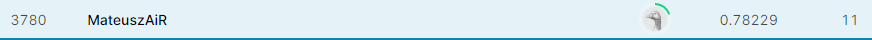

# **Wnioski końcowe**
Analizując zmiany podczas uczenia zauważyłem iż grupowanie znacznie zwiększa dokładność otrzymanych rezultatów. Liczba grup a co za tym idzie ich przedziały nie zawsze mają znaczący wkład w otrzymany wynik. W przypadku dodania do zmiennych znaczących "opłat pasażerów" (Fare_analiza) nie spowodowało to zmiany otrzymanego rezultatu. Może to być spowodowane iż ten parametr zawiera się w klasie podóży (Pclass).  Zmiany parametrów ilości drzew decyzyjnych oraz ich maksymalnej głębokości powodowały pogorszenie rezultatów do poziomu końca samouczka. Może być to spowodowane złym doborem obliczeniowym funkcji, przez co wycofałem się z ich zmiany. Myślę, że istotny wpływ mogły mieć kabiny pasażerów lecz bardzo duży brach danych w tej kolumnie uniemożliwia rozsądną ich analize. Również przypisanie wieku w brakujących kolumnach pogorszyło mój wynik. Może być to spowodowane tym iż zosaliby przydzieleni do złej grupy wiek. Moim najlepszym otrzymanym wynikiem był: 0,78229, Po dodaniu brakujących komuek bez podanego wieku oraz lekkiej korekcie kodu (train, train_data) otrzymałem wyniki lepsze niż w samoiczku lecz o mniejszej dokładności niż bez ich uzupełniania.